HW 3 of Computational methods 540

Review of basic statistics:MVN

Generate random 2000 MVN data, $p=3$ 

(the covariance matrix should be positive semi-definite symmetric matrix)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import *

%matplotlib inline
np.random.seed(42)

In [3]:
mu3 = np.array([5,1,2])
C = np.random.random((3,3))
cov3 = C @ C.T # positive semi-definite

In [12]:
print(f"The trivariate normal distribution mean vector: {mu3} \nThe covariance matrix:\n{np.round(cov3,2)}")

The trivariate normal distribution mean vector: [5 1 2] 
The covariance matrix:
[[1.58 0.49 1.29]
 [0.49 0.41 0.26]
 [1.29 0.26 1.11]]


In [45]:
# cov3[0,0],cov3[0,1],cov3[0,2],cov3[1,0],cov3[1,1],cov3[1,2],cov3[2,0],cov3[2,1],cov3[2,2]

Generate random 2000 MVN data

In [4]:
n = 2000 #2000 samples from x1 x2 x3
data = np.random.multivariate_normal(mu3, cov3, size=n)
x1 = data[:, 0]
x2 = data[:, 1]
x3 = data[:,2]

(1) Compare sample means $\bar{x}_{l}$ and population means $\mu_{i},$ where $i=1,2,3$.

In [13]:
# np.mean(x1),np.mean(x2),np.mean(x3)

In [14]:
print(f"The trivariate normal sample means are {np.mean(x1), np.mean(x2), np.mean(x3)} \nThe population means are {mu3}")

The trivariate normal sample means are (5.079467800927094, 1.0199059704513433, 2.0676023746970795) 
The population means are [5 1 2]


(2) Compare sample variances $s_{i}^{2}$ and population variances $\sigma_{i}^{2}$, where $i=1,2,3$.

In [49]:
# np.var(x1),np.var(x2),np.var(x3)

In [50]:
print(f"The sample variances are{np.var(x1),np.var(x2),np.var(x3)} \nThe population variances are {cov3[0,0,],cov3[1,1],cov3[2,2]}")

The sample variances are(1.5634255838183977, 0.3951779083144373, 1.1075923347544558) 
The population variances are (1.5799531238872828, 0.40706808724152177, 1.1149740788550657)


(3) Compare sample covariances $\widehat{\operatorname{Cov}}\left(x_{i}, x_{j}\right)=\hat{\sigma}_{i j}$ and population covariances $\sigma_{i j},$ where $i, j=1,2,3, i \neq j$

In [51]:
# cov3[0,1],cov3[1,2],cov3[0,2]

In [52]:
# np.cov(x1,x2)[1][0],np.cov(x2,x3)[1][0],np.cov(x1,x3)[1][0]

In [53]:
print(f"The sample covariances are {np.cov(x1,x2)[1][0],np.cov(x2,x3)[1][0],np.cov(x1,x3)[1][0]} \nTHepopulation covariances  are {cov3[0,1],cov3[1,2],cov3[0,2]}")

The sample covariances are (0.4771032394764348, 0.26142323085951885, 1.2762466148643967) 
THepopulation covariances  are (0.4867378171972655, 0.2636825197885506, 1.285253243591714)


(4) Compare sample correlations $r_{i j}=\hat{\rho}_{i j}$ and population correlations $\rho_{i j},$ where $i, j=$ $1,2,3, i \neq j$

In [54]:
#sample correlations: rhij
#population correlations: rij

rh12=np.corrcoef(x1,x2)[1][0],
rh13=np.corrcoef(x1,x3)[1][0],
rh23=np.corrcoef(x2,x3)[1][0]

r12 = cov3[0,1]/np.sqrt(cov3[0,0] * cov3[1,1]),
r13 = cov3[0,2]/np.sqrt(cov3[0,0] * cov3[2,2]),

r23 = cov3[1,2]/np.sqrt(cov3[1,1] * cov3[2,2])

In [55]:
print(f"The sample correlations are {r12,r13,r23} \nThe population correlations are {rh12,rh13,rh23}")

The sample correlations are ((0.6069311964606677,), (0.9683541589636978,), 0.39139513804645726) 
The population correlations are ((0.6066807675139404,), (0.9693683227746348,), 0.39494868877027633)


(5) Calculate conditional expectation $E\left[X_{1} \mid x_{2}=6\right], E\left[X_{3} \mid x_{1}=10\right]$ and conditional variance $V\left[X_{1} \mid x_{2}=6\right], V\left[X_{3} \mid x_{1}=10\right]$

In [56]:
X2 = 6
Ec1 = mu3[0] + cov3[0][1]/cov3[1][1] *(X2-mu3[1])
Vc1 = cov3[0][0] - cov3[0][1]**2/cov3[1][1]

In [57]:
print(f"The conditional expectation of E[X1|x2=6] is {Ec1}\nThe  conditional variation V[X1|x2=6] is {Vc1} ")

The conditional expectation of E[X1|x2=6] is 10.978579904109187
The  conditional variation V[X1|x2=6] is 0.9979529373941742 


In [58]:
X1 = 10
Ec3 = mu3[2] + cov3[0][2]/cov3[0][0] *(X1-mu3[0])
Vc3 = cov3[2][2] - cov3[0][2]**2/cov3[0][0]

In [59]:
print(f"The conditional expectation of E[X1|x2=6] is {Ec3}\nThe  conditional variation V[X1|x2=6] is {Vc3} ")

The conditional expectation of E[X1|x2=6] is 6.067377772669307
The  conditional variation V[X1|x2=6] is 0.06945198380785222 


(6) Plot the histograms of $x_{1}, x_{2}$ and $x_{3}$.

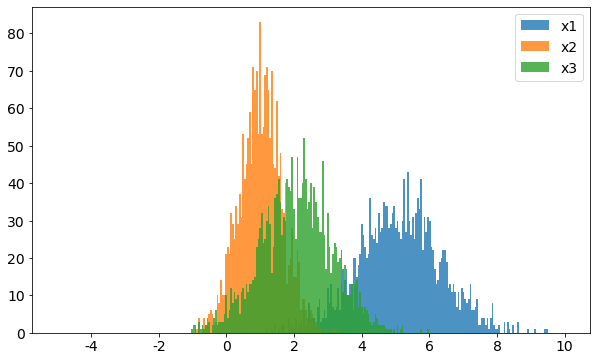

In [49]:
_, ax = plt.subplots(figsize=(10, 6))
bins = np.linspace(-5, 10, 300)
alpha = 0.8

fs = 14

xs = [x1, x2, x3]
labels = ['x1', 'x2', 'x3']
for i in range(3):
    ax.hist(xs[i], bins, alpha=alpha, label=labels[i])

plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)
ax.legend(fontsize=fs)

(7) The joint p.d.f. of $X_{1}, X_{2}$ and $X_{3}$ is $f\left(x_{1}, x_{2}, x_{3}\right),$ calculate $f(0,0,0)$ and $f(0,0,1.2)$

In [7]:
def f(x1, x2, x3):
    part1 = (2*np.pi) ** (-1.5) * np.linalg.det(cov3)**(-0.5)
    part2 = np.exp(-.5 * (np.array(x1,x2,x3) - mu3).T @ np.linalg.inv(cov3) @ (np.array(x1,x2,x3) - mu3))
    return part1 * part2

In [8]:
np.matmul

<ufunc 'matmul'>

In [61]:
# cov3[0,0],cov3[0,1],cov3[0,2],cov3[1,0],cov3[1,1],cov3[1,2],cov3[2,0],cov3[2,1],cov3[2,2]

(1) Compare sample means $\overline{x_{l}}$ and population means $\mu_{i}$, where $i=1,2,3$.
(2) Compare sample variances $s_{i}^{2}$ and population variances $\sigma_{i}^{2}$, where $i=1,2,3$.
(3) Compare sample covariances $\widehat{\operatorname{Cov}}\left(x_{i}, x_{j}\right)=\hat{\sigma}_{i j}$ and population covariances $\sigma_{i j},$ where $i, j=1,2,3, i \neq j$
(4) Compare sample correlations $r_{i j}=\hat{\rho}_{i j}$ and population correlations $\rho_{i j},$ where $i, j=$ $1,2,3, i \neq j$
(5) Calculate conditional expectation $E\left[X_{1} \mid x_{2}=6\right], E\left[X_{3} \mid x_{1}=10\right]$ and conditional variance $V\left[X_{1} \mid x_{2}=6\right], V\left[X_{3} \mid x_{1}=10\right]$
(6) Plot the histograms of $x_{1}, x_{2}$ and $x_{3}$.
(7) The joint p.d.f. of $X_{1}, X_{2}$ and $X_{3}$ is $f\left(x_{1}, x_{2}, x_{3}\right),$ calculate $f(0,0,0)$ and $f(0,0,1.2)$
(8) Plot the scatter plots of $X_{1} \& X_{2}, X_{1} \& X_{3}$ and $X_{2} \& X_{3}$.

(8) Plot the scatter plots of $X_{1} \& X_{2}, X_{1} \& X_{3}$ and $X_{2} \& X_{3}$.

In [16]:
from itertools import *

inds = range(3)
inds_cov = list(combinations(inds, 2))
inds_cov

[(0, 1), (0, 2), (1, 2)]

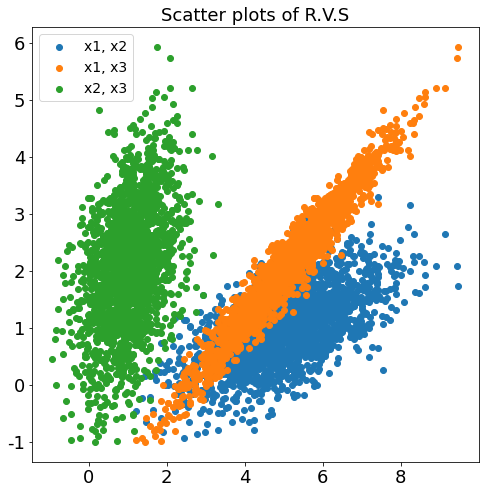

In [47]:
_, ax = plt.subplots(figsize=(8, 8))

fs = 18

for ind in inds_cov:
    X_cov = np.vstack((xs[ind[0]], xs[ind[1]])).T
    ax.scatter(X_cov[:,0], X_cov[:,1], label=f'{labels[ind[0]]}, {labels[ind[1]]}')

plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)
ax.set_title("Scatter plots of R.V.S", fontsize=fs)
ax.legend(fontsize=fs-4)